# Measuring Dark Matter with Gravitational Lensing
## Introduction
In 1915, Albert Einstein told us that any form of matter and energy bends spacetime. Since light travels in straight lines in spacetime, if spacetime is bent, then the paths of light rays will also be bent. This effect allows light to bend around regions of space with a lot of mass. We call this Gravitational Lensing.

Lensing was first confirmed by Sir Arthur Eddington in 1919 when he observed a background star being deflected by the Sun. Today, astronomers observe lensing all around us. In fact, it is one of the primary tools used to measure the amount of <b>Dark Matter</b> in the Universe. When astronomers observe massive clusters of galaxies, they can get lucky and also observe a background galaxy that is being gravitationally lensed by the galaxy cluster. The amount of distortions tells astronomers about the size and shape of the unseen Dark Matter distribution around the galaxy cluster. This allows us to <i>indirectly</i> measure where the Dark Matter is located on the largest scales of the Universe.

In this activity, we will simulate the effect of Gravitational Lensing and come away with a better understanding of how astronomers measure the properties of the "lens" by observing the multiple "images" of a background galaxy.

## The Jupyter Notebook

To understand lensing, we will have to do a lot of numerical computations. Luckily, all of this can be handled using an IPython Notebook. The notebook allows us to dynamically visualize a lensing event. Each of the <b>cells</b> with an <font color='blue'>In [ 1 ]</font> number are pieces of Python code that can be executed by hitting SHIFT+ENTER when the cell is selected.  We can execute all of the cells at once by selecting "Run all" from the Cell menu in the toolbar above, note that this may take a while. 

<ol>
  <li>Select "Run All" from the Cell menu in the tool bar to run all of the cells in the Notebook.</li>
</ol>


### Import the Libraries
This cell will import all of the libraries and functions that we'll be using in the activity. 

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
from scipy.misc import imread
from ipywidgets import interact,fixed,Checkbox,Text
import IPython.display as disp
import dm_funcs as dm
imshow_kwargs={'interpolation': 'nearest', 'origin': 'lower', 'cmap': cm.jet,'extent':[-1,1,-1,1]}

### Set up the Background Galaxy
We will be fitting a distribution of matter (think the size and shape of a large amount of <b>Dark Matter</b>) to real gravitational lensing images taken by the Hubble Space Telescope. 

We first have to set up our background galaxy. The code below will set up a "galaxy" with some basic properties.
<ol>
  <li>Select the number of "pixels" (n) in each direction that you want to use to make your background galaxy. <b> A smaller number of pixels will make the notebook run faster! </b> </li>
  <li> Adjust the other sliders to change the properties of the galaxy. Briefly explain what each slider does to the galaxy. </li>
</ol>

<b> To reset your galaxy, simply execute the code block below by selecting it and pressing SHIFT+Enter</b>.

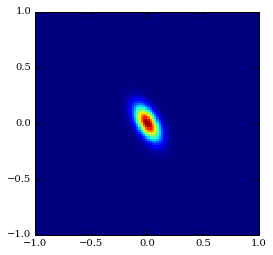

In [2]:
global x,y,galaxy_properties,gal
@interact(n=(10,400,50),sigma=(.01,.5,.01),xcen=(-1,1,.1),ycen=(-1,1,.1),axratio=(.2,4,.1),posangle=(0,180,5))
def set_number_of_points(n=100,sigma=0.2,xcen=0,ycen=0,axratio=2.0,posangle=30):
    """Set up a mock galaxy with the input parameters.
        n:              sets the number of points in each direction.
        sigma:          sets the 'width' of the galaxy.
        xcen & ycen:    set the center of the galaxy.
        axratio:        sets the ellipticity of the galaxy.
        posangle:       sets the orientation of the galaxy. """
    
    global x,y,galaxy_properties,gal
    (x,y) = dm.load_grid(n)
    galaxy_properties={'peak':1,'sigma':sigma,'xcen':xcen,'ycen':ycen,'axratio':axratio,'posangle':posangle}
    gal = dm.create_galaxy(x,y,**galaxy_properties)
    plt.imshow(gal,**imshow_kwargs);

## The Hubble Space Telescope Data
You can view the real images of gravitational lensing that we'll be using below. 
<ol>
 <li> Select each image from the drop down menu and identify what you think is the "background galaxy". Note that in all images the source of the lensing is at the center of the image. These sources are made up of both normal matter and unseen Dark Matter. </li>

</ol>

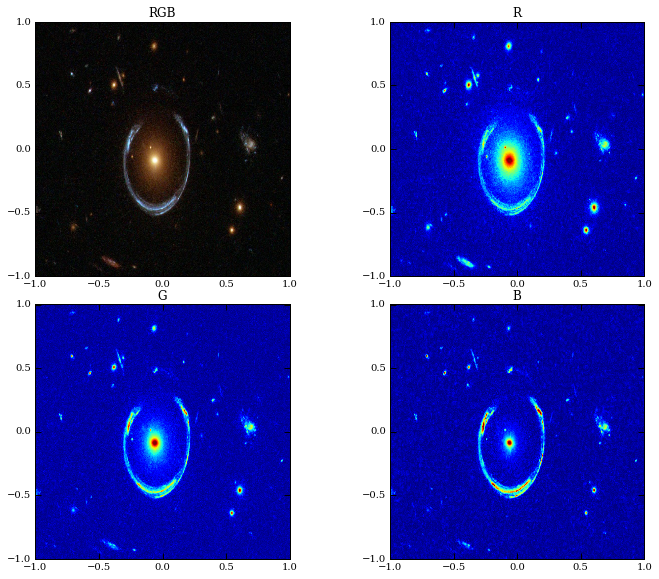

In [3]:
images=dm.load_images();
@interact(Galaxy={'Galaxy 1':'lens1.jpg','Galaxy 2':'lens2.jpg', 'Galaxy 3':'lens3.jpg','Galaxy 4':'lens4.jpg'})
def view_real_galaxy(Galaxy):
    """Display the HST image in four plots.
        The first shows the composite image 
        and the other plots show the image in the Red, Blue, and Green bands."""

    plt.close();
    im2 = imread(Galaxy);
    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,8));
    plt.tight_layout();
    ax1.imshow(im2,extent=imshow_kwargs['extent']);
    ax2.imshow(im2[:,:,0],extent=imshow_kwargs['extent']);
    ax3.imshow(im2[:,:,1],extent=imshow_kwargs['extent']);
    ax4.imshow(im2[:,:,2],extent=imshow_kwargs['extent']);
    ax2.set_title('R');
    ax3.set_title('G');
    ax4.set_title('B');
    ax1.set_title('RGB');
    plt.show();

## Let's Fit the Data!

We want to adjust the properties of the central dark matter distribution (the "lens"), so that we can reproduce the observed lensing. Below you can load each of the Hubble images and adjust the properties of the central source (these are the same properties as for the galaxy above). 

<ol>
    <li> Select a Hubble image from the drop down menu. You will see three images pop up. </li>
        <ul>
            <li> The left image is the result of your background galaxy being gravitationally lensed. </li>
            <li> The middle image is one "color" of the Hubble image with the central source removed in some cases. <B> This is what you are fitting to! </b> </li> 
            <li> The right image is the full color Hubble image for reference. </li>  <br>
        </ul>
    <li> Adjust the sliders to change the left image until you get a good fit to the middle image. </li>
        <ul>
            <li> What do these sliders represent? </li>
            <li> How does each slider affect the resulting image? Do any intereseting patterns emerge? </li>
        </ul> <br>
    <li> Once you think you have a good fit, input a file name into the <b>FileName</b> textbox and click the <b>SaveToFile</b> checkbox to save the three images. Note that you have to adjust one of the sliders slightly to save the file. <b> You will be turning in these files </b>! </li> <br>
    
    <li> Repeat these steps for each of the Hubble images in the drop down menu. Remember that you can change the background galaxy properties by using the sliders above. </li>
</ol>

<b> Some Hints: <b>
<ul>
    <li> <b>Adjust the xcen and ycen parameters last.</b> </li> 
    <li> <b>To get a ring adjust the DarkMatterAxisRatio and DarkMatterSize sliders. </b> </li>
    <li> <b> You can reset the activity by selecting the cell below this one and hitting SHIFT+ENTER. </b> </li>
    <li> <b> You can also reset your background galaxy in the same way by selecting the cell where you adjusted the galaxy properites above, and hitting SHIFT+ENTER.</b> </li>
<ul>

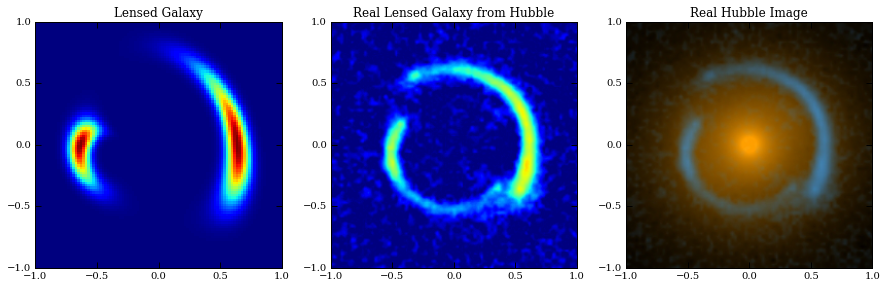

In [4]:
def start_activity():
    """ Set up the activity by setting up the plotting environment 
            and calling the interactive function."""
    global gal
    fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(15,8)) 
    ax1.set_title('Lensed Galaxy')
    ax2.set_title('Real Lensed Galaxy from Hubble')
    ax3.set_title('Real Hubble Image')
    im_m = ax2.imshow(images['Exercise 1'][0],extent=imshow_kwargs['extent'])
    im_r = ax3.imshow(images['Exercise 1'][1],extent=imshow_kwargs['extent'])
    im_l = ax1.imshow(gal,**imshow_kwargs)
    cbox = Checkbox(description='Save To File',value=False)
    disp.display(cbox)
    @interact(Image=images,FileName=Text(value='My File Name'),DarkMatterSize=(0,3,.1), \
              DarkMatterXCenter=(-1,1,.01),DarkMatterYCenter=(-1,1,.01),DarkMatterAxisRatio=(.01,4,.03),\
              DarkMatterPositionAngle=(0,180,5))
    def plot_galaxy(FileName='My File Name',Image=images,DarkMatterSize=.1,DarkMatterXCenter=0,\
                    DarkMatterYCenter=0,DarkMatterAxisRatio=1,DarkMatterPositionAngle=0):
        global x,y,galaxy_properties,gal
       
        plt.close();
        xl,yl = dm.compute_deflection(x,y,Mass=DarkMatterSize,xcen=DarkMatterXCenter, \
                                      ycen=DarkMatterYCenter,axratio=DarkMatterAxisRatio,\
                                      posangle=DarkMatterPositionAngle)
        gal = dm.create_galaxy(x-xl,y-yl,**galaxy_properties)
 
        im_l.set_data(gal)
        im_m.set_data(Image[0])
        im_r.set_data(Image[1])
  
        disp.display(fig)       
        if cbox.value:
            if FileName == '':
                FileName = 'Untitled'
            FileName.strip('')
            FileName += '.jpg'
            print 'Saving File in ' + FileName
            fig.savefig(FileName)
            cbox.value = False
            
start_activity()    

## Finishing Up

In this activity, we've fit some Hubble images of gravitational lensing. We did this by placing a large amount of dark matter between us and a background galaxy, and then we calculated how the light from the background galaxy bends around the dark matter on its way towards us. The properties of the resulting image tells us about the properties of the dark matter.

In practice this is one way in which astronomers measure the large scale distribution of dark matter. They take an image that has some gravitational lensing and then they "adjust the sliders" in their model until they reproduce the observed image. These sliders encode the details of how much mass there is in the dark matter and what its shape looks like.

## Extra Credit with Python
If you still have time after completing all of the activities above, feel free to edit some Python code! Here are some things to try.
<ul>
    <li> Edit the <b>cm.jet</b> variable in the <b>imshow_kwargs</b> variable at the top of the notebook. It's right after all of the <font color='green'>import</font> statements. Select "Run all" again from the "Cell" menu in the top toolbar to implement your changes. Here are some options you can change it to: </li> <br>
        <ul> <ul>
            <li> cm.spectral</li>
            <li> cm.rainbow</li>
            <li> cm.gnuplot</li>
            <li> cm.flag</li>
            <li> cm.prism</li>          
        </ul> </ul><br>
    <li> Take a look at the file dm_funcs.py which is in the same folder as this notebook. This file contains all of the helper functions that do most of the calculations. </li> <br>
    <li> Look for some other Hubble images and try to load them into the notebook. You'll need to edit the load_images function in the dm_funcs.py file. </li> <br>
    <li> Finally, you can enter in your own Python code in the cell below this line! </li>
</ul>
